In [10]:
import matplotlib.pyplot as plt
import zipfile
import pickle
import numpy as np

In [3]:
with zipfile.ZipFile('models_dicts.zip', 'r') as f:
    f.extractall('./')

In [4]:
names = ['bam', 'cbam', 'eca', 'resnet', 'se']
info = {}

for name in names:
    with open(f'./models/{name}/{name}.pkl', 'rb') as f:
        info[name] = pickle.load(f)

In [16]:
def make_plots(logging_dict, model_name, avg_train=True, loss_kws=None, acc_kws=None):
#     logging_dict = {'loss': {'train': [], 'validation': []},
#                 'accuracy': {'train': [], 'validation': []},
#                 'lr': [],
#                 'batches_per_epoch': [],}
    epoch_ends = np.cumsum(logging_dict['batches_per_epoch'])
    
    def get_avg_per_epoch(batch_data):
        result = [None,]
        for i in range(len(epoch_ends) - 1):
            result.append(np.average(batch_data[epoch_ends[i]:epoch_ends[i + 1]]))
        return result
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    metrics = ('loss', 'accuracy')
    for metric, ax in zip(metrics, axes.ravel()):
        if avg_train:
            ax.plot(get_avg_per_epoch(logging_dict[metric]['train']), '.-', label='training set')
            ax.plot(logging_dict[metric]['validation'], '.-', label='validation set')
            ax.set(title=metric, xlabel='epoch', xticks=np.arange(len(epoch_ends)))
        else:
            ax.plot(logging_dict[metric]['train'],'.-', label='training set')
            ax.plot(epoch_ends, logging_dict[metric]['validation'],'.-', label='validation set')
            ax.set(title=metric, xlabel='batch')
        if metric == 'loss' and loss_kws:
            ax.set(**loss_kws)
        elif metric == 'accuracy' and acc_kws:
            ax.set(**acc_kws)
    
    handles, labels = ax.get_legend_handles_labels()
    plt.figlegend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

In [24]:
for model in info:
    print(model)
    print(max(info[model]['logging_dict']['accuracy']['train']))
    print(max(info[model]['logging_dict']['accuracy']['validation']))
    

bam
0.8984375
0.51875
cbam
0.96875
0.547265625
eca
0.9453125
0.5451171875
resnet
0.8984375
0.5251953125
se
0.96875
0.541015625


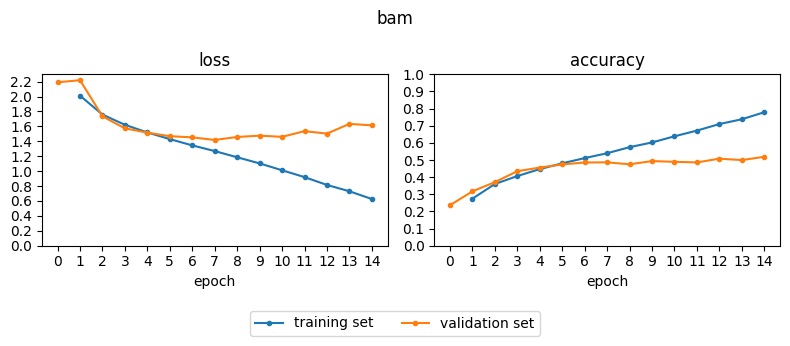

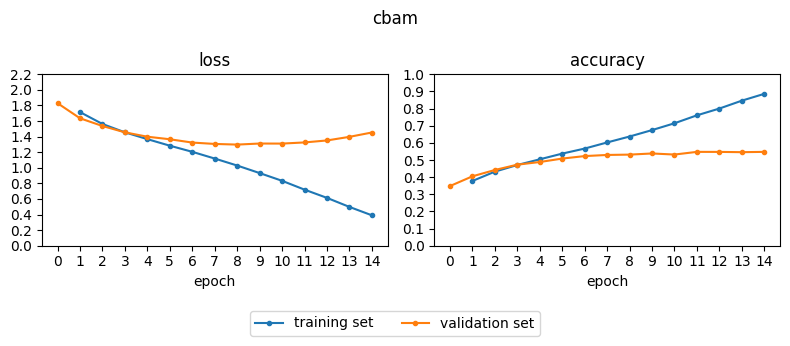

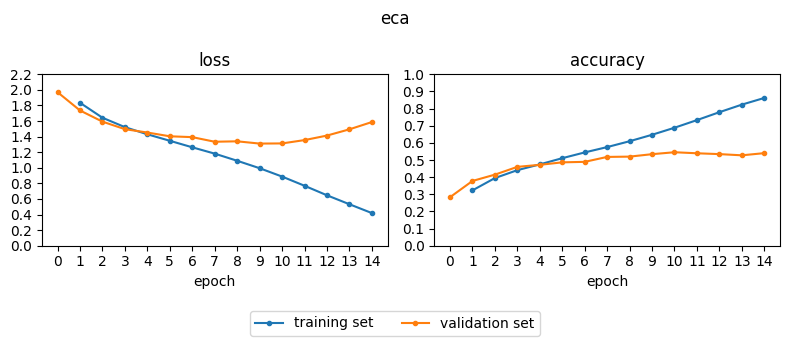

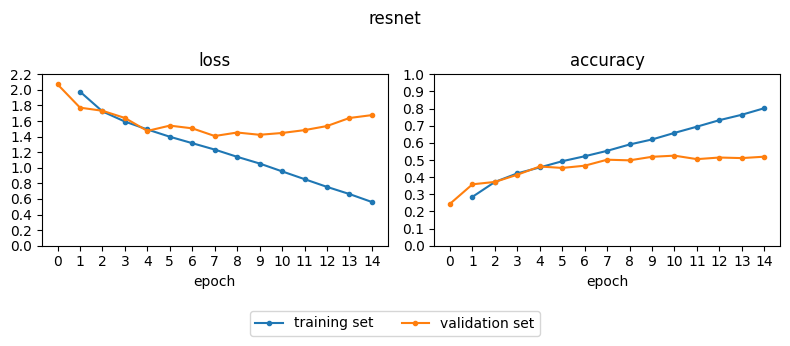

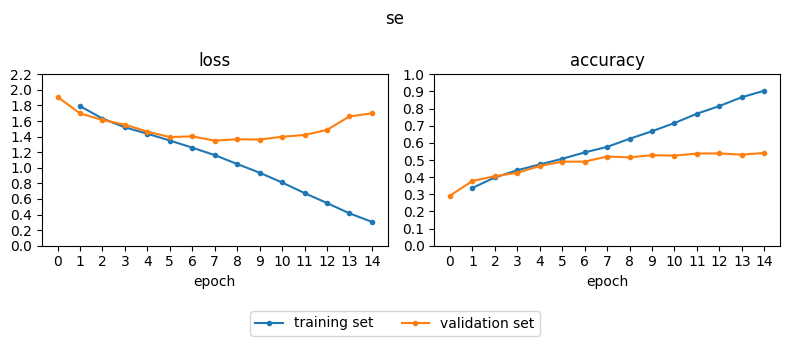

In [21]:
for model in info:
    make_plots(info[model]['logging_dict'],
               model,
               loss_kws=dict(yticks=np.arange(0, 2.3, 0.2)),
               acc_kws=dict(yticks=np.arange(0, 1.1, 0.1)))